In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [3]:
churn_df = churn_master_df.copy()

In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [10]:
churn_df.shape

(7043, 10)

In [11]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
ServiceCount        7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7016 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 550.3+ KB


In [12]:
#TotalCharges is having lesser values(7016 vs 7043)

In [22]:
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [14]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [23]:
churn_df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'tenure',
 'ServiceCount',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [24]:
churn_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [26]:
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64

In [144]:
#nunique() function will give unique values of each column - very helpful in understanding the nature of each column

In [147]:
churn_df.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7013    False
7014    False
7015    False
7016    False
7017    False
7018    False
7019    False
7020    False
7021    False
7022    False
7023    False
7024    False
7025    False
7026    False
7027    False
7028    False
7029    False
7030    False
7031    False
7032    False
7033    False
7034    False
7035    False
7036    False
7037    False
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [149]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


In [37]:
churn_df[churn_df.isna().any(axis=1)].shape

(27, 10)

In [40]:
#Two observations - 1. Churn (Target column) is 'No' for all the null values
#2. Tenure is zero in many rows where TotalCharges is null
#3. MonthlyCharges and Tenure are correlated with TotalCharges

In [42]:
churn_df['TotalCharges'].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

In [44]:
#Mean and Median(50%) value are varying by huge margin
#Very high Max value compared to range
#That means we cannot use Mean or Median to fill missing values

In [46]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


In [150]:
#describe function gives only ordinal value columns (not categorical)

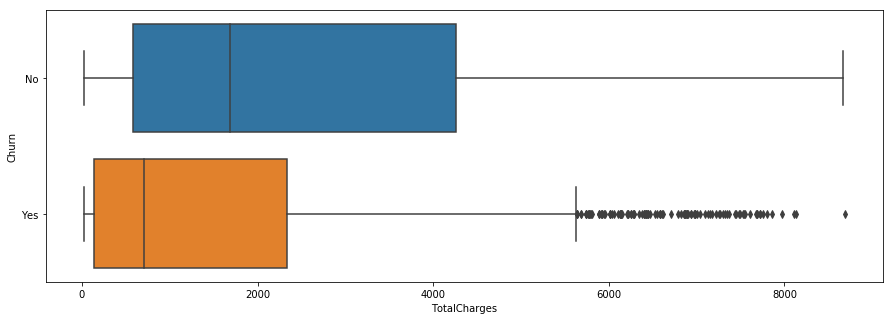

In [50]:
plt.figure(figsize=(15,5))

sns.boxplot(x=churn_df['TotalCharges'], y=churn_df['Churn'])

In [151]:
#Boxplots are used to find outliers and range of data
#In this graph, the range of Totalcharges for each churn (Yes and No) are shown
#It also gives an idea of the nature of data distribution

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


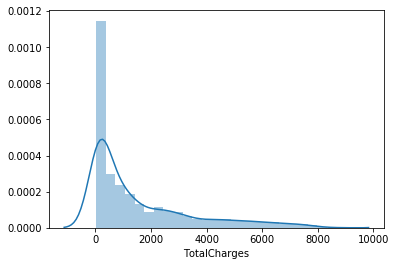

In [154]:
sns.distplot(churn_df[churn_df['Churn']=='Yes']['TotalCharges'],hist=True)

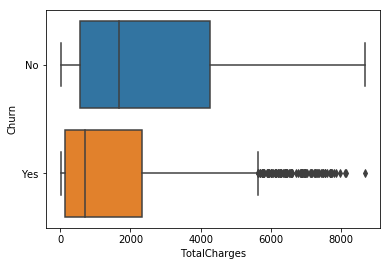

In [155]:
sns.boxplot(x='TotalCharges',y='Churn', data=churn_df)

In [68]:
churn_df[churn_df['Churn']=='No']['TotalCharges'].shape

(5174,)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


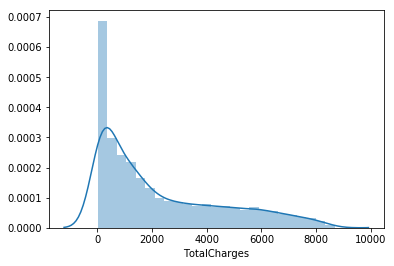

In [104]:
sns.distplot(churn_df[churn_df['TotalCharges'].isna()==False]['TotalCharges'], hist=True)

In [71]:
#This graph shows that the distribution is RIGHT SKEWED

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


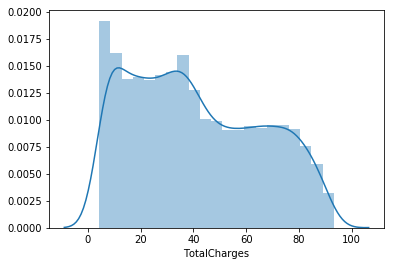

In [105]:
sns.distplot(churn_df[churn_df['TotalCharges'].isna()==False]['TotalCharges'].apply(np.sqrt), hist=True)

In [72]:
#To remove skewness, one needs to change the power and hence, we shall use the sq.rt function

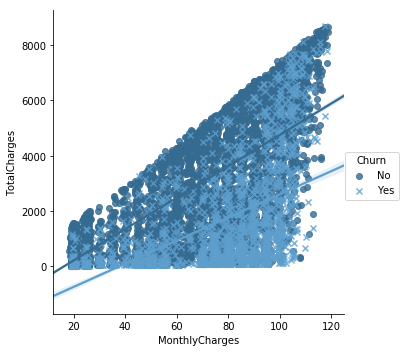

In [78]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data= churn_df, fit_reg=True, hue='Churn', palette='Blues_d', markers=['o','x'])

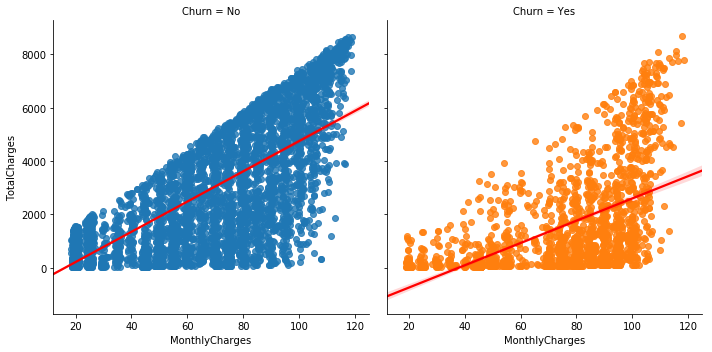

In [86]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=churn_df, col='Churn', hue='Churn', fit_reg=True, line_kws={'color':'Red'})

In [156]:
#As the deviation of all points from the line is high, although there is a linear relation, the strength of the relation is low and has a higher error value

In [88]:
churn_df[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.650964
TotalCharges,0.650964,1.000000


In [157]:
#This shows a 65% correlation between the two columns
#One has to look for values in other columns influencing the loss of 35% correlation

In [93]:
churn_df[['MonthlyCharges','TotalCharges']].corr(method='spearman')

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.638126
TotalCharges,0.638126,1.000000


In [99]:
churn_df[churn_df['Churn']=='No'][['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.00000,0.75739
TotalCharges,0.75739,1.00000


In [158]:
#We see that the correlation increases for the dataset having Churn='No'
#So, having the Churn column equal to 'Yes' has accounted for 10% loss of correlation

In [108]:
churn_df_no = churn_df[(churn_df['TotalCharges'].isna()==False) & (churn_df['Churn']=='No')]

In [121]:
churn_df_no.shape

(5147, 10)

In [122]:
churn_df_no.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [123]:
from scipy import stats

In [124]:
#Now try to create a linear regression equation between MonthlyCharge and TotalCharge when Churn is NO

In [159]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_df_no['MonthlyCharges'],churn_df_no['TotalCharges'])

In [160]:
print('slope: ', slope)
print('intercept: ', intercept)
print('R-value: ', r_value)
print('P-value: ', p_value)
print('Standard Error: ', std_err)
print('R-squared: ', r_value**2)

slope:  56.73637552696061
intercept:  -922.8160085118088
R-value:  0.7573902887184031
P-value:  0.0
Standard Error:  0.681926186783515
R-squared:  0.573640049444946


In [161]:
#R-value is the coefficient of correlation
#P-value is the probability value and 0.0 shows that the variable considered is very significant
#R-squared value is the coefficient of variance
#std_err is high - sum of all residual errors from the regression line

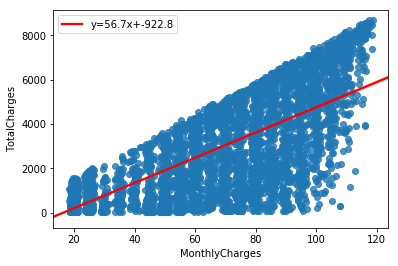

In [134]:
#regplot to show the dependency between the two lines
ax = sns.regplot('MonthlyCharges', 'TotalCharges', data=churn_df_no, fit_reg=True, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend()

In [162]:
#Now, let's try to find the Linear Regression correlation between TotalCharges and tenure columns

In [135]:
churn_df_no['tenure'].head()

0     1
1    34
3    45
6    22
7    10
Name: tenure, dtype: int64

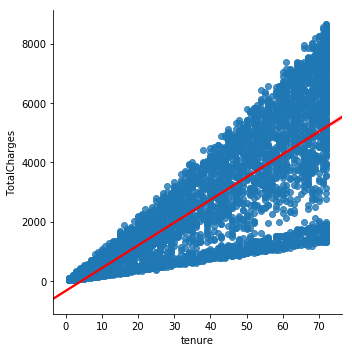

In [137]:
sns.lmplot(x='tenure', y='TotalCharges', data=churn_df_no, fit_reg=True,line_kws={'color':'red'}, palette='Blue_d')

In [139]:
churn_df_no[['tenure','TotalCharges']].corr()

,tenure,TotalCharges
tenure,1.000000,0.793288
TotalCharges,0.793288,1.000000


In [163]:
#higher correlation between tenure and totalcharges (79%) compared to monthlycharges(75%)

In [164]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(churn_df_no['tenure'], churn_df_no['TotalCharges'])

In [165]:
print('slope: ', slope1)
print('intercept: ', intercept1)
print('R-value: ', r_value1)
print('P-value: ', p_value1)
print('Standard Error: ', std_err1)
print('R-squared: ', r_value**2)

slope:  76.74259761920023
intercept:  -334.0856050604698
R-value:  0.7932877280232583
P-value:  0.0
Standard Error:  0.8211475250987226
R-squared:  0.573640049444946


In [166]:
#Here, we see that the R-value is slightly better than earlier
#However, we still see the Standard Error and R-squared is high
#Hence, this will not be a linear relationship - therefore, cannot be used for data imputation within TotalCharges

In [167]:
#We see that both tenure and MonthlyCharges have linear relationship with TotalCharges individually
#Hence, let's combine both tenure and MonthlyCharges and try to estimate the relation with TotalCharges
#For this, let's create a new column 'tenure_charges'

In [168]:
churn_df_no['tenure_charges'] = churn_df_no['tenure']*churn_df_no['MonthlyCharges']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
churn_df_no.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [175]:
churn_df_no[churn_df_no['tenure_charges']==0].isna().sum()

customerID          0
gender              0
SeniorCitizen       0
tenure              0
ServiceCount        0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_charges      0
dtype: int64

In [177]:
churn_df_no[['TotalCharges','tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999535
tenure_charges,0.999535,1.000000


In [179]:
#99% correlation between TotalCharges and tenure_charges
#let's try to establish a linear relationship by finding the parameters

In [181]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x=churn_df_no['TotalCharges'],y=churn_df_no['tenure_charges'])

In [182]:
print('Slope: ', slope2)
print('Intercept: ', intercept2)
print('R-Value: ', r_value2)
print('P-Value: ', p_value2)
print('Standard Error: ', std_err2)
print('R-squared: ', r_value**2)

Slope:  0.99889839380189
Intercept:  2.6762608967787855
R-Value:  0.9995350350972922
P-Value:  0.0
Standard Error:  0.00042482023898474157
R-squared:  0.9990702863869453


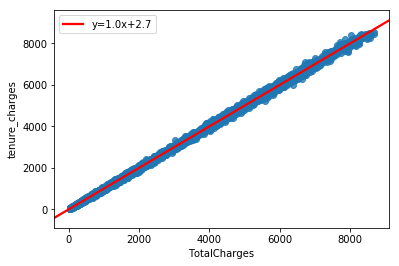

In [194]:
ax = sns.regplot(x=churn_df_no['TotalCharges'], y=churn_df_no['tenure_charges'], fit_reg=True, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope2,intercept2)})
ax.legend()

In [195]:
#Behavior is linear and the standard error is less
#Hence, this relation is good for imputing the missing values

In [ ]:
#Function to impute values - 

In [200]:
def fillna(tenure, monthlycharge):
    if tenure==0:
        totalcharges=monthlycharge
    else:
        totalcharges=tenure*monthlycharge
        totalcharges = intercept2+(slope2*totalcharges)
    return round(totalcharges,2)

In [201]:
churn_df['TotalCharges_new'] = churn_df.apply(lambda x:x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'], x['MonthlyCharges']), axis=1)

In [202]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalCharges_new
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1889.50
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1840.75
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes,151.65


In [203]:
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
TotalCharges_new     0
dtype: int64

In [205]:
churn_df[churn_df['TotalCharges'].isna()==True][['tenure', 'MonthlyCharges', 'TotalCharges','TotalCharges_new']]

,tenure,MonthlyCharges,TotalCharges,TotalCharges_new
431,72,65.20,NaN,4691.90
488,0,52.55,NaN,52.55
753,0,20.25,NaN,20.25
936,0,80.85,NaN,80.85
1082,0,25.75,NaN,25.75
1261,2,80.15,NaN,162.80
1287,30,107.50,NaN,3224.12
1340,0,56.05,NaN,56.05
1487,56,106.80,NaN,5976.89
1846,19,18.80,NaN,359.48


In [52]:
churn_df.corr(method='pearson')

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


In [53]:
churn_df.corr(method='spearman')

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.018556,-0.097589,0.221067,0.106272
tenure,0.018556,1.000000,0.500568,0.276417,0.889258
ServiceCount,-0.097589,0.500568,1.000000,0.061477,0.377167
MonthlyCharges,0.221067,0.276417,0.061477,1.000000,0.638126
TotalCharges,0.106272,0.889258,0.377167,0.638126,1.000000
